<a href="https://colab.research.google.com/github/Basim415/BrickByBrick/blob/main/Brick_By_Brick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from pathlib import Path

# Change into your repo folder
os.chdir("/content/BrickByBrick")
print("Current working directory:", os.getcwd())

# Quick check: list what's inside
!ls -la


Current working directory: /content/BrickByBrick
total 36
drwxr-xr-x 7 root root 4096 Sep 18 21:18 .
drwxr-xr-x 1 root root 4096 Sep 18 21:18 ..
drwxr-xr-x 2 root root 4096 Sep 18 21:18 app
drwxr-xr-x 8 root root 4096 Sep 18 21:18 .git
-rw-r--r-- 1 root root 1070 Sep 18 21:18 LICENSE
drwxr-xr-x 2 root root 4096 Sep 18 21:18 notebooks
-rw-r--r-- 1 root root   14 Sep 18 21:18 README.md
drwxr-xr-x 4 root root 4096 Sep 18 21:18 reports
drwxr-xr-x 2 root root 4096 Sep 18 21:18 src


In [2]:
import os
os.chdir("/content/BrickByBrick")  # change to your repo folder
print("Current working directory:", os.getcwd())


Current working directory: /content/BrickByBrick


In [3]:
from pathlib import Path

REPO_ROOT = Path.cwd()
FIGDIR = REPO_ROOT / 'reports' / 'figures'
TBLDIR = REPO_ROOT / 'reports' / 'tables'
DATADIR = REPO_ROOT / 'data'
FIGDIR.mkdir(parents=True, exist_ok=True)
TBLDIR.mkdir(parents=True, exist_ok=True)
DATADIR.mkdir(parents=True, exist_ok=True)

print("Repo root:", REPO_ROOT)


Repo root: /content/BrickByBrick


In [4]:
!pip -q install kaggle pandas numpy scikit-learn matplotlib plotly folium shapely geopandas lightgbm


In [5]:
from google.colab import files
uploaded = files.upload()  # upload kaggle.json

Path.home().joinpath('.kaggle').mkdir(exist_ok=True)
os.replace('kaggle.json', str(Path.home()/'.kaggle'/'kaggle.json'))
os.chmod(str(Path.home()/'.kaggle'/'kaggle.json'), 0o600)

!kaggle datasets download -d zillow/zecon -p data
!unzip -o data/zecon.zip -d data
!ls -la data | head -n 50


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zillow/zecon
License(s): copyright-authors
 92% 470M/511M [00:01<00:00, 292MB/s]
100% 511M/511M [00:01<00:00, 377MB/s]
Archive:  data/zecon.zip
  inflating: data/City_time_series.csv  
  inflating: data/CountyCrossWalk_Zillow.csv  
  inflating: data/County_time_series.csv  
  inflating: data/DataDictionary.csv  
  inflating: data/Metro_time_series.csv  
  inflating: data/Neighborhood_time_series.csv  
  inflating: data/State_time_series.csv  
  inflating: data/Zip_time_series.csv  
  inflating: data/all_available_metrics.json  
  inflating: data/cities_crosswalk.csv  
  inflating: data/fields_per_level.json  
total 2390824
drwxr-xr-x 2 root root      4096 Sep 18 21:19 .
drwxr-xr-x 8 root root      4096 Sep 18 21:19 ..
-rw-r--r-- 1 root root      3409 Sep 21  2019 all_available_metrics.json
-rw-r--r-- 1 root root   1074309 Sep 21  2019 cities_crosswalk.csv
-rw-r--r-- 1 root root 689627012 Sep 21  2019 City_ti

In [6]:
import pandas as pd
import glob

paths = glob.glob('data/*Metro*time*series*.csv') + glob.glob('data/*metro*series*.csv')
paths = sorted(paths)
print(paths[:5])  # first few candidate files


['data/Metro_time_series.csv']


In [7]:
if not paths:
    raise FileNotFoundError("Couldn't find a metro time-series CSV in data/. Check the listing above.")

metro_path = paths[0]
df = pd.read_csv(metro_path)
print('Loaded:', metro_path)
df.head(3)


Loaded: data/Metro_time_series.csv


,Date,RegionName,AgeOfInventory,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,InventorySeasonallyAdjusted_BottomTier,InventorySeasonallyAdjusted_MiddleTier,InventorySeasonallyAdjusted_TopTier,MedianListingPricePerSqft_1Bedroom,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28600.0,28600.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,10300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53000.0,NaN,78500.0,78600.0,124800.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Detect date column
date_col = next((c for c in df.columns if 'date' in c), None)
if not date_col:
    raise KeyError('No date-like column found.')

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col)

df.head(3), df.columns.tolist()[:20]


(          date regionname  ageofinventory  daysonzillow_allhomes  \
 0   1996-04-30      10180             NaN                    NaN   
 451 1996-04-30      36900             NaN                    NaN   
 452 1996-04-30      36940             NaN                    NaN   
 
      inventoryseasonallyadjusted_allhomes  inventoryraw_allhomes  \
 0                                     NaN                    NaN   
 451                                   NaN                    NaN   
 452                                   NaN                    NaN   
 
      inventoryseasonallyadjusted_bottomtier  \
 0                                       NaN   
 451                                     NaN   
 452                                     NaN   
 
      inventoryseasonallyadjusted_middletier  \
 0                                       NaN   
 451                                     NaN   
 452                                     NaN   
 
      inventoryseasonallyadjusted_toptier  medianlisting

In [9]:
# Guess geo column
name_cols = [c for c in df.columns if c in ['regionname','metro','name','region_name']]
geo_col = name_cols[0] if name_cols else None
print("Geo column:", geo_col)

# Guess target column
value_candidates = ['zhvi','median_home_value','value','median_value','median_sale_price','medianlistingprice']
target_col = next((c for c in value_candidates if c in df.columns), None)
print("Target column:", target_col)

df_small = df[[date_col] + ([geo_col] if geo_col else []) + ([target_col] if target_col else [])].copy()
df_small.head(5)


Geo column: regionname
Target column: None


,date,regionname
0,1996-04-30,10180
451,1996-04-30,36900
452,1996-04-30,36940
453,1996-04-30,36980
454,1996-04-30,37020


In [10]:
metros_interest = [
    'Sacramento', 'Roseville', 'Folsom',
    'San Francisco', 'Oakland', 'Berkeley',
    'San Jose', 'Sunnyvale', 'Santa Clara'
]

if geo_col:
    mask = df_small[geo_col].astype(str).str.contains('|'.join(metros_interest), case=False, na=False)
    df_focus = df_small[mask].copy()
else:
    df_focus = df_small.copy()

print(df_focus[geo_col].drop_duplicates().head(20) if geo_col else "No geo col")
df_focus.head(3)


Series([], Name: regionname, dtype: object)


,date,regionname


/tmp/ipython-input-1855903565.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize=8)


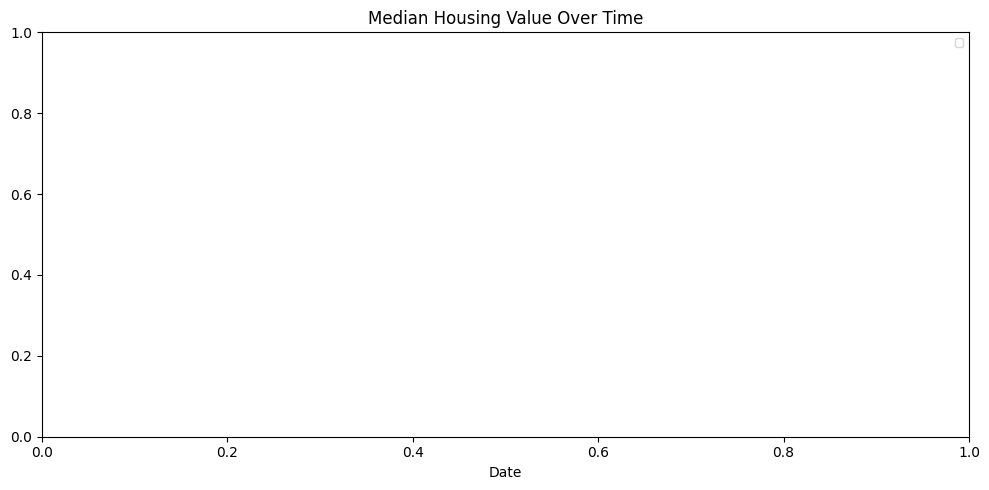

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

for g, sub in df_focus.groupby(geo_col):
    sub = sub.sort_values(date_col)
    plt.plot(sub[date_col], sub[target_col], label=g)

plt.legend(loc='best', fontsize=8)
plt.title('Median Housing Value Over Time')
plt.xlabel('Date'); plt.ylabel(target_col)
plt.tight_layout()
plt.savefig(FIGDIR / "trend_values.png", dpi=200)
plt.show()


In [12]:
fe = df_focus.copy()
fe['year'] = fe[date_col].dt.year
fe['month'] = fe[date_col].dt.month

def add_lags(frame, col, lags=(1,12)):
    frame = frame.sort_values(date_col)
    for L in lags:
        frame[f'{col}_tminus{L}'] = frame[col].shift(L)
    return frame

fe = fe.groupby(geo_col, group_keys=False).apply(lambda g: add_lags(g, target_col)).dropna()
fe.head(5)


/tmp/ipython-input-3572637255.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fe = fe.groupby(geo_col, group_keys=False).apply(lambda g: add_lags(g, target_col)).dropna()


,date,regionname,year,month
regionname,,,,


In [16]:
import os
os.chdir("/content/BrickByBrick")  # update if your repo name differs
print("CWD:", os.getcwd())


CWD: /content/BrickByBrick


In [17]:
import glob, pandas as pd

# find a metro-level time series CSV
paths = sorted(glob.glob('data/*Metro*time*series*.csv') + glob.glob('data/*metro*series*.csv'))
assert paths, "No metro time-series CSV found in data/. Re-run the Kaggle download/unzip cells."
metro_path = paths[0]
df = pd.read_csv(metro_path)

# clean columns + date
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
date_col = next((c for c in df.columns if 'date' in c), None)
assert date_col, "No date column found; inspect df.columns"
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col)
print("Loaded:", metro_path, "| date_col:", date_col)


Loaded: data/Metro_time_series.csv | date_col: date


In [19]:
target_col = 'zhvi_allhomes'
assert target_col in df.columns, f"target_col '{target_col}' not in df.columns"

# pick a geo/name column if present
name_cols = [c for c in df.columns if c in ['regionname','metro','name','region_name','region']]
geo_col = name_cols[0] if name_cols else None
print("geo_col:", geo_col, "| target_col:", target_col)


geo_col: regionname | target_col: zhvi_allhomes


In [20]:
# minimal columns
cols = [date_col, target_col] + ([geo_col] if geo_col else [])
df_small = df[cols].copy()

# focus on Sac + Bay Area labels if geo exists; fall back to full set if no matches
if geo_col:
    metros_interest = [
        'Sacramento','Roseville','Folsom',
        'San Francisco','Oakland','Berkeley',
        'San Jose','Sunnyvale','Santa Clara'
    ]
    mask = df_small[geo_col].astype(str).str.contains('|'.join(metros_interest), case=False, na=False)
    df_focus = df_small[mask].copy()
    if df_focus.empty:
        df_focus = df_small.copy()
else:
    df_focus = df_small.copy()

# feature engineering with safe lags
fe = df_focus.copy()
fe['year'] = fe[date_col].dt.year
fe['month'] = fe[date_col].dt.month

def add_lags(frame, date_col, target_col, lags=(1,12)):
    frame = frame.sort_values(date_col)
    for L in lags:
        frame[f'{target_col}_tminus{L}'] = frame[target_col].shift(L)
    return frame

if geo_col and (geo_col in fe.columns):
    fe = fe.groupby(geo_col, group_keys=False).apply(lambda g: add_lags(g, date_col, target_col))
else:
    fe = add_lags(fe, date_col, target_col)

fe = fe.dropna().reset_index(drop=True)
print("fe shape:", fe.shape, "| sample cols:", [c for c in fe.columns if c not in [date_col, target_col]][:8])


fe shape: (165619, 7) | sample cols: ['regionname', 'year', 'month', 'zhvi_allhomes_tminus1', 'zhvi_allhomes_tminus12']


/tmp/ipython-input-190675879.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fe = fe.groupby(geo_col, group_keys=False).apply(lambda g: add_lags(g, date_col, target_col))


In [21]:
import pandas as pd
CUTOFF = pd.Timestamp("2024-01-01")

train = fe[fe[date_col] < CUTOFF].copy()
test  = fe[fe[date_col] >= CUTOFF].copy()

exclude = [date_col, target_col]
if geo_col and (geo_col in fe.columns):
    exclude.append(geo_col)

# numeric-only features
num_cols = [c for c in fe.columns if pd.api.types.is_numeric_dtype(fe[c])]
feature_cols = [c for c in num_cols if c not in exclude]

X_train, y_train = train[feature_cols], train[target_col]
X_test,  y_test  = test[feature_cols],  test[target_col]

print("Features:", feature_cols[:12], "..." if len(feature_cols)>12 else "")
print("Train/Test shapes:", X_train.shape, X_test.shape)


Features: ['year', 'month', 'zhvi_allhomes_tminus1', 'zhvi_allhomes_tminus12'] 
Train/Test shapes: (165619, 4) (0, 4)


In [22]:
CUTOFF = pd.Timestamp("2024-01-01")

train = fe[fe[date_col] < CUTOFF].copy()
test  = fe[fe[date_col] >= CUTOFF].copy()

feature_cols = [c for c in fe.columns if c not in [date_col, target_col, geo_col]]
X_train, y_train = train[feature_cols], train[target_col]
X_test, y_test = test[feature_cols], test[target_col]

X_train.shape, X_test.shape


((165619, 4), (0, 4))

In [25]:
print("Date min:", fe[date_col].min())
print("Date max:", fe[date_col].max())


Date min: 1997-04-30 00:00:00
Date max: 2017-12-31 00:00:00


In [29]:
CUTOFF = pd.Timestamp("2016-01-01")


In [32]:
# Set target column explicitly
target_col = 'zhvi_allhomes'
print("target_col set to:", target_col)


target_col set to: zhvi_allhomes


In [33]:
assert target_col in df.columns, f"{target_col} not found in df.columns"


In [31]:
print("date_col:", date_col)
print("target_col:", target_col)


date_col: date
target_col: None


In [35]:
import pandas as pd

# Safety checks
assert date_col is not None, "date_col is None. Make sure you re-ran the cell that sets date_col."
assert target_col is not None, "target_col is None. Set it explicitly, e.g. target_col = 'zhvi_allhomes'."

# Always use last 24 months as test
cutoff_date = fe[date_col].max() - pd.DateOffset(months=24)

train = fe[fe[date_col] < cutoff_date].copy()
test  = fe[fe[date_col] >= cutoff_date].copy()

exclude = [date_col, target_col]
if geo_col and (geo_col in fe.columns):
    exclude.append(geo_col)

# numeric-only features only
num_cols = [c for c in fe.columns if pd.api.types.is_numeric_dtype(fe[c])]
feature_cols = [c for c in num_cols if c not in exclude]

X_train, y_train = train[feature_cols], train[target_col]
X_test,  y_test  = test[feature_cols],  test[target_col]

print("Cutoff date:", cutoff_date.date())
print("Train shape:", train.shape, "| Test shape:", test.shape)
print("Features:", feature_cols[:12], "..." if len(feature_cols) > 12 else "")


Cutoff date: 2015-12-31
Train shape: (147369, 7) | Test shape: (18250, 7)
Features: ['year', 'month', 'zhvi_allhomes_tminus1', 'zhvi_allhomes_tminus12'] 


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def eval_model(model, Xtr, ytr, Xte, yte, name):
    model.fit(Xtr, ytr)
    pred = model.predict(Xte)
    mse = mean_squared_error(yte, pred)
    rmse = np.sqrt(mse)
    return {
        "model": name,
        "RMSE": rmse,
        "MAE": mean_absolute_error(yte, pred),
        "R2": r2_score(yte, pred)
    }

results = []
results.append(eval_model(LinearRegression(), X_train, y_train, X_test, y_test, "Linear"))
results.append(eval_model(RandomForestRegressor(n_estimators=400, random_state=42), X_train, y_train, X_test, y_test, "RandomForest"))

metrics = pd.DataFrame(results)
display(metrics)

# save results for README
metrics.to_csv(TBLDIR / "metrics.csv", index=False)
print("Saved metrics to:", TBLDIR / "metrics.csv")


,model,RMSE,MAE,R2
0,Linear,1153.097947,739.468899,0.999865
1,RandomForest,4555.510306,969.140389,0.997897


Saved metrics to: /content/BrickByBrick/reports/tables/metrics.csv


from matplotlib import pyplot as plt
metrics['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='MAE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('RMSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('RMSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MAE']
  ys = series['R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('MAE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MAE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MAE'}, axis=1)
              .sort_values('MAE', ascending=True))
  xs = counted['MAE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('MAE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
metrics['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics, x='RMSE', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics, x='MAE', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics, x='R2', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import pandas as pd

# combine train+test to fit final model
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

best_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # fills any NaNs in features
    ("lr", LinearRegression())
])
best_model.fit(X_full, y_full)
print("final model fitted with imputer + linear regression")


final model fitted with imputer + linear regression


In [41]:
import numpy as np

# start from the latest row in fe
latest = fe.sort_values(date_col).iloc[-1:].copy()

future_preds = []
current = latest.copy()

for i in range(12):
    # predict next value
    y_pred = best_model.predict(current[feature_cols])[0]
    next_date = current[date_col].iloc[0] + pd.DateOffset(months=1)

    # build the next row by rolling the lags forward
    new_row = current.copy()
    new_row[date_col] = next_date
    new_row[target_col] = y_pred
    new_row[f"{target_col}_tminus1"] = current[target_col].iloc[0]
    # tminus12 will be imputed if missing; optionally set it equal to tminus1 for the first 11 steps:
    if f"{target_col}_tminus12" in new_row.columns and pd.isna(new_row[f"{target_col}_tminus12"].iloc[0]):
        new_row[f"{target_col}_tminus12"] = new_row[f"{target_col}_tminus1"]

    future_preds.append({"date": next_date, "predicted_value": y_pred})
    current = new_row

future_df = pd.DataFrame(future_preds)
future_df.head()


,date,predicted_value
0,2018-01-31,206640.104360
1,2018-02-28,207285.324208
2,2018-03-28,207651.061014
3,2018-04-28,208344.908767
4,2018-05-28,208738.209843


 Saved plot -> /content/BrickByBrick/reports/figures/historical_vs_forecast.png


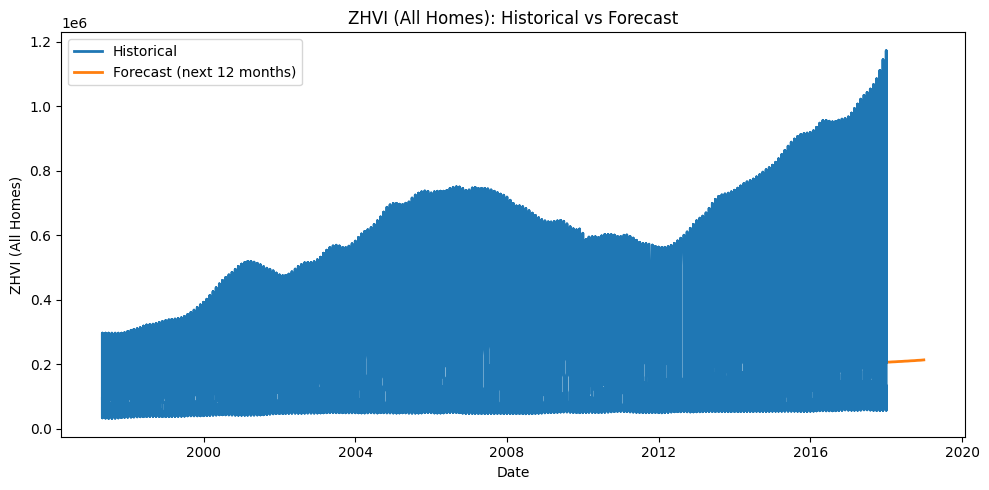

In [43]:
import matplotlib.pyplot as plt

hist = fe[[date_col, target_col]].sort_values(date_col)
plt.figure(figsize=(10,5))
plt.plot(hist[date_col], hist[target_col], label="Historical", linewidth=2)
plt.plot(future_df["date"], future_df["predicted_value"], label="Forecast (next 12 months)", linewidth=2)
plt.title("ZHVI (All Homes): Historical vs Forecast")
plt.xlabel("Date"); plt.ylabel("ZHVI (All Homes)")
plt.legend()
plt.tight_layout()

out_path = FIGDIR / "historical_vs_forecast.png"
plt.savefig(out_path, dpi=200)
print("Saved plot ->", out_path)
plt.show()


In [44]:
import pandas as pd
import numpy as np

fe_ext = fe.copy()

# 1) growth rates
fe_ext['pct_change_1']  = fe_ext[target_col].pct_change()
fe_ext['pct_change_3']  = fe_ext[target_col].pct_change(3)
fe_ext['pct_change_12'] = fe_ext[target_col].pct_change(12)

# 2) rolling means (trend smoothers)
fe_ext['roll3']  = fe_ext[target_col].rolling(3).mean()
fe_ext['roll6']  = fe_ext[target_col].rolling(6).mean()
fe_ext['roll12'] = fe_ext[target_col].rolling(12).mean()

# 3) seasonality (month one-hots)
month_ohe = pd.get_dummies(fe_ext['month'].astype(int), prefix='m', drop_first=True)
fe_ext = pd.concat([fe_ext, month_ohe], axis=1)

# 4) drop rows created as NaN by rolling/pct_change
fe_ext = fe_ext.dropna().reset_index(drop=True)

print("fe_ext shape:", fe_ext.shape)
fe_ext.head(3)


fe_ext shape: (165607, 24)


,date,zhvi_allhomes,regionname,year,month,zhvi_allhomes_tminus1,zhvi_allhomes_tminus12,pct_change_1,pct_change_3,pct_change_12,...,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,1997-04-30,48500.0,36830,1997,4,48100.0,47000.0,-0.111722,-0.187605,-0.481283,...,False,True,False,False,False,False,False,False,False,False
1,1997-04-30,69200.0,37140,1997,4,69200.0,68800.0,0.426804,0.203478,0.197232,...,False,True,False,False,False,False,False,False,False,False
2,1997-04-30,108900.0,36820,1997,4,108900.0,108900.0,0.573699,0.994505,0.442384,...,False,True,False,False,False,False,False,False,False,False


In [45]:
# columns to exclude from features
exclude = [date_col, target_col]
if geo_col and (geo_col in fe_ext.columns):
    exclude.append(geo_col)

# numeric features only
num_cols = [c for c in fe_ext.columns if pd.api.types.is_numeric_dtype(fe_ext[c])]
feature_cols2 = [c for c in num_cols if c not in exclude]

# time-aware split
cutoff_date = fe_ext[date_col].max() - pd.DateOffset(months=24)
train2 = fe_ext[fe_ext[date_col] < cutoff_date].copy()
test2  = fe_ext[fe_ext[date_col] >= cutoff_date].copy()

X_train2, y_train2 = train2[feature_cols2], train2[target_col]
X_test2,  y_test2  = test2[feature_cols2],  test2[target_col]

print("Cutoff:", cutoff_date.date())
print("Train2:", X_train2.shape, " Test2:", X_test2.shape)
print("Feature count:", len(feature_cols2))


Cutoff: 2015-12-31
Train2: (147357, 21)  Test2: (18250, 21)
Feature count: 21


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# optional LightGBM (skip gracefully if not installed)
try:
    from lightgbm import LGBMRegressor
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

def fit_eval(model, name):
    model.fit(X_train2, y_train2)
    pred = model.predict(X_test2)
    rmse = float(np.sqrt(mean_squared_error(y_test2, pred)))
    mae  = float(mean_absolute_error(y_test2, pred))
    r2   = float(r2_score(y_test2, pred))
    return {"model": name, "RMSE": rmse, "MAE": mae, "R2": r2, "estimator": model}

models = []

# Linear (imputer + scaler + LR)
lin = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
models.append(fit_eval(lin, "Linear+Imputer+Scaler"))

# Random Forest (tree models don’t need scaling)
rf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1))
])
models.append(fit_eval(rf, "RandomForest"))

# LightGBM (if available)
if HAS_LGBM:
    lgbm = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("lgbm", LGBMRegressor(n_estimators=800, learning_rate=0.05, subsample=0.9,
                               colsample_bytree=0.9, random_state=42))
    ])
    models.append(fit_eval(lgbm, "LightGBM"))

metrics2 = pd.DataFrame([{"model": m["model"], "RMSE": m["RMSE"], "MAE": m["MAE"], "R2": m["R2"]} for m in models])
display(metrics2.sort_values("RMSE"))
metrics2.to_csv(TBLDIR / "metrics_rich_features.csv", index=False)
print("Saved ->", TBLDIR / "metrics_rich_features.csv")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2095
[LightGBM] [Info] Number of data points in the train set: 147357, number of used features: 21
[LightGBM] [Info] Start training from score 135047.845708


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,model,RMSE,MAE,R2
0,Linear+Imputer+Scaler,1152.136482,740.330272,0.999866
1,RandomForest,4709.710228,952.014932,0.997753
2,LightGBM,9882.368947,1790.673310,0.990105


Saved -> /content/BrickByBrick/reports/tables/metrics_rich_features.csv


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1) narrow to last ~10 years to shrink rows
ten_year_cut = fe_ext[date_col].max() - pd.DateOffset(years=10)
mask10 = fe_ext[date_col] >= ten_year_cut
X_cv = fe_ext.loc[mask10, feature_cols2].reset_index(drop=True)
y_cv = fe_ext.loc[mask10, target_col].reset_index(drop=True)
print("CV window:", ten_year_cut.date(), "→", fe_ext[date_col].max().date(), "| rows:", len(X_cv))

# 2) define fast models
lin_fast = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

rf_fast = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(
        n_estimators=80, max_depth=10, min_samples_leaf=5,
        random_state=42, n_jobs=-1
    ))
])

candidates = [("Linear+Imputer+Scaler (CV)", lin_fast),
              ("RF-small (CV)", rf_fast)]

# 3) 3-fold time-series split (rolling origin)
tscv = TimeSeriesSplit(n_splits=3)
rows = []
for name, pipe in candidates:
    fold = 1
    for tr, te in tscv.split(X_cv):
        Xtr, Xte = X_cv.iloc[tr], X_cv.iloc[te]
        ytr, yte = y_cv.iloc[tr], y_cv.iloc[te]
        pipe.fit(Xtr, ytr)
        pred = pipe.predict(Xte)
        rmse = float(np.sqrt(mean_squared_error(yte, pred)))
        mae  = float(mean_absolute_error(yte, pred))
        r2   = float(r2_score(yte, pred))
        rows.append({"model": name, "fold": fold, "RMSE": rmse, "MAE": mae, "R2": r2})
        fold += 1

cv_fast = pd.DataFrame(rows)
cv_summary = cv_fast.groupby("model").agg(RMSE_mean=("RMSE","mean"),
                                          RMSE_std=("RMSE","std"),
                                          MAE_mean=("MAE","mean"),
                                          R2_mean=("R2","mean")).reset_index()

display(cv_fast)
display(cv_summary.sort_values("RMSE_mean"))
cv_fast.to_csv(TBLDIR / "cv_fast_folds.csv", index=False)
cv_summary.to_csv(TBLDIR / "cv_fast_summary.csv", index=False)
print("Saved ->", TBLDIR / "cv_fast_folds.csv")
print("Saved ->", TBLDIR / "cv_fast_summary.csv")


CV window: 2007-12-31 → 2017-12-31 | rows: 85473


,model,fold,RMSE,MAE,R2
0,Linear+Imputer+Scaler (CV),1,1132.386877,729.968098,0.999727
1,Linear+Imputer+Scaler (CV),2,1072.819924,725.594101,0.999825
2,Linear+Imputer+Scaler (CV),3,1136.723150,750.167599,0.999866
3,RF-small (CV),1,1366.971938,842.403312,0.999603
4,RF-small (CV),2,4129.035811,999.438072,0.997414
5,RF-small (CV),3,6960.290170,1066.900189,0.994963


,model,RMSE_mean,RMSE_std,MAE_mean,R2_mean
0,Linear+Imputer+Scaler (CV),1113.976651,35.708653,735.243266,0.999806
1,RF-small (CV),4152.099306,2796.730440,969.580524,0.997327


Saved -> /content/BrickByBrick/reports/tables/cv_fast_folds.csv
Saved -> /content/BrickByBrick/reports/tables/cv_fast_summary.csv


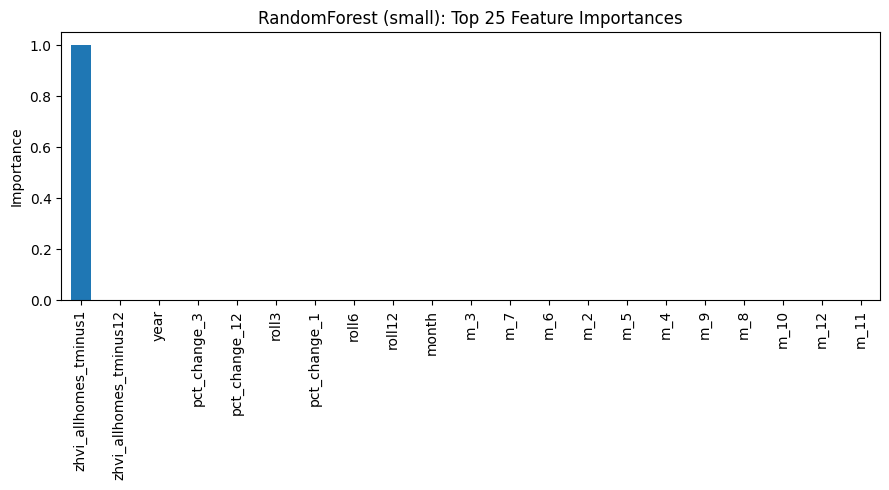

Saved -> /content/BrickByBrick/reports/figures/rf_importances_small.png


In [51]:
import matplotlib.pyplot as plt

rf_small = RandomForestRegressor(
    n_estimators=80,   # down from 400
    max_depth=12,      # limit depth
    random_state=42,
    n_jobs=-1
)

rf_small.fit(X_train2, y_train2)
importances = pd.Series(rf_small.feature_importances_, index=feature_cols2).sort_values(ascending=False)[:25]

plt.figure(figsize=(9,5))
importances.plot(kind="bar")
plt.title("RandomForest (small): Top 25 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
p = FIGDIR / "rf_importances_small.png"
plt.savefig(p, dpi=200); plt.show()
print("Saved ->", p)


In [52]:
import joblib

# pick the model with the lowest RMSE from metrics2
best_name = metrics2.loc[metrics2["RMSE"].idxmin(), "model"]
best_est  = next(m["estimator"] for m in models if m["model"] == best_name)
print("Best model by RMSE:", best_name)

# fit best model on ALL data (train2 + test2)
X_full2 = pd.concat([X_train2, X_test2], axis=0)
y_full2 = pd.concat([y_train2, y_test2], axis=0)
best_est.fit(X_full2, y_full2)

# persist model & a single latest feature row (for quick testing / Streamlit)
joblib.dump(best_est, TBLDIR / "best_model.joblib")
latest_row = fe_ext.sort_values(date_col).iloc[-1:].copy()
latest_row[feature_cols2].to_csv(TBLDIR / "latest_features.csv", index=False)

print("Saved ->", TBLDIR / "best_model.joblib")
print("Saved ->", TBLDIR / "latest_features.csv")


Best model by RMSE: Linear+Imputer+Scaler
Saved -> /content/BrickByBrick/reports/tables/best_model.joblib
Saved -> /content/BrickByBrick/reports/tables/latest_features.csv


In [53]:
def predict_next_month(fitted_model, last_feature_row, feature_cols):
    """Return next month prediction given the last available feature row (DataFrame with 1 row)."""
    return float(fitted_model.predict(last_feature_row[feature_cols])[0])

def forecast_horizon(fitted_model, last_row_full, feature_cols, months=12):
    """
    Iteratively forecast for `months` steps ahead.
    `last_row_full` should include date_col, target_col, and lag features so we can roll them forward.
    """
    preds = []
    current = last_row_full.copy()
    for _ in range(months):
        y_pred = float(fitted_model.predict(current[feature_cols])[0])
        next_date = current[date_col].iloc[0] + pd.DateOffset(months=1)

        new_row = current.copy()
        new_row[date_col] = next_date
        new_row[target_col] = y_pred
        # roll lags we know we used; imputer in pipeline will cover gaps if any
        if f"{target_col}_tminus1" in new_row.columns:
            new_row[f"{target_col}_tminus1"] = current[target_col].iloc[0]
        if f"{target_col}_tminus12" in new_row.columns and pd.isna(new_row[f"{target_col}_tminus12"].iloc[0]):
            new_row[f"{target_col}_tminus12"] = new_row[f"{target_col}_tminus1"]

        preds.append({"date": next_date, "predicted_value": y_pred})
        current = new_row
    return pd.DataFrame(preds)

# quick demo forecast (12 months) with best model fit on all data
latest_full = fe_ext.sort_values(date_col).iloc[-1:].copy()
future_df2 = forecast_horizon(best_est, latest_full, feature_cols2, months=12)
display(future_df2.head())


,date,predicted_value
0,2018-01-31,206653.429103
1,2018-02-28,207297.245676
2,2018-03-28,207676.484866
3,2018-04-28,208367.317833
4,2018-05-28,208774.251959


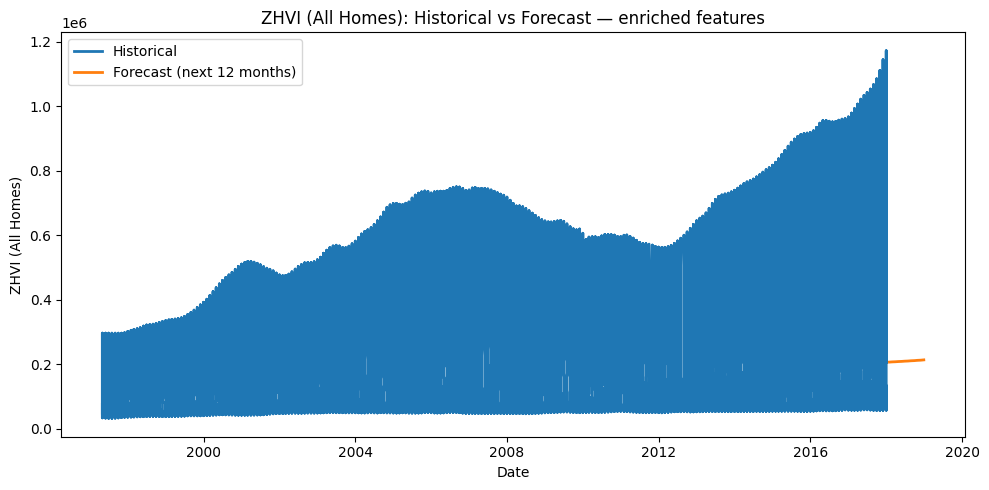

Saved -> /content/BrickByBrick/reports/figures/historical_vs_forecast_rich.png


In [54]:
import matplotlib.pyplot as plt

hist2 = fe_ext[[date_col, target_col]].sort_values(date_col)

plt.figure(figsize=(10,5))
plt.plot(hist2[date_col], hist2[target_col], label="Historical", linewidth=2)
plt.plot(future_df2["date"], future_df2["predicted_value"], label="Forecast (next 12 months)", linewidth=2)
plt.title("ZHVI (All Homes): Historical vs Forecast — enriched features")
plt.xlabel("Date"); plt.ylabel("ZHVI (All Homes)")
plt.legend()
plt.tight_layout()
p = FIGDIR / "historical_vs_forecast_rich.png"
plt.savefig(p, dpi=200); plt.show()
print("Saved ->", p)
